C:\Users\St Antonys\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0.]


C:\Users\St Antonys\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


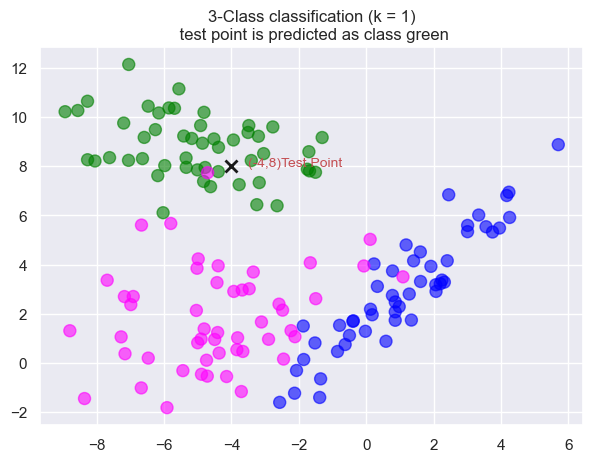

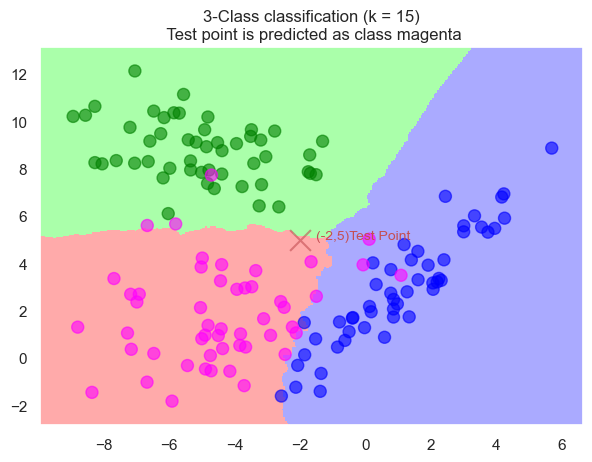

In [2]:
#import required python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from matplotlib.colors import ListedColormap

sns.set()
#loading data from the csv file
data = pd.read_csv('task6_1_dataset.csv')

#training the above dataset with k=1 
weights='uniform'
k = 1
knn = neighbors.KNeighborsClassifier(k,weights=weights)

x1 = data['x1']
x2 = data['x2']
y = data['y']

colors = ['green', 'blue', 'magenta']

X_train = np.c_[x1, x2]
Y_train = np.c_[y]

knn.fit(X_train, Y_train)


cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

fig,ax = plt.subplots(figsize=(7, 5), dpi=100)

#plot the classification of X_train
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=0.6, s=75)

plt.title("3-Class classification (k = {})".format(k))

#test the kNN classifier with [-4, 8] (1st testing point) 
#create an input to predict its label
X_test = [[-4, 8]]
Y_pred = knn.predict(X_test)

#to check the predicted label for the X_test
print(Y_pred)

#plot the test input
ax.scatter(X_test[0][0], X_test[0][1], marker="x", s=75, lw=2, c='k')
label = '(' + str(X_test[0][0]) + ',' + str(X_test[0][1]) + ')' + 'Test Point'
ax.text(X_test[0][0] + 0.5, X_test[0][1], label, fontsize=10, c='r')
ax.set_title("3-Class classification (k = {})\n test point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]));

#train the above dataset with k=15 
k = 15
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

# step size in the mesh
h = 0.05

# Create colour maps
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=0.6, s=75)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

X_test = [[-2, 5]]
Y_pred = knn.predict(X_test)
ax.scatter(X_test[0][0], X_test[0][1], marker="x", alpha=0.6, color='r', s=3*75)
label = '(' + str(X_test[0][0]) + ',' + str(X_test[0][1]) + ')' + 'Test Point'
ax.text(X_test[0][0] + 0.5, X_test[0][1], label, fontsize=10, c='r')
ax.set_title("3-Class classification (k = {})\n Test point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]));